In [1]:
print("hello")

hello


{0: array(0.18341776), 1: array(0.16835396), 2: array(0.13763326), 3: array(0.11085905), 4: array(0.10861479), 5: array(0.10656115), 6: array(0.10740012), 7: array(0.10732022)}


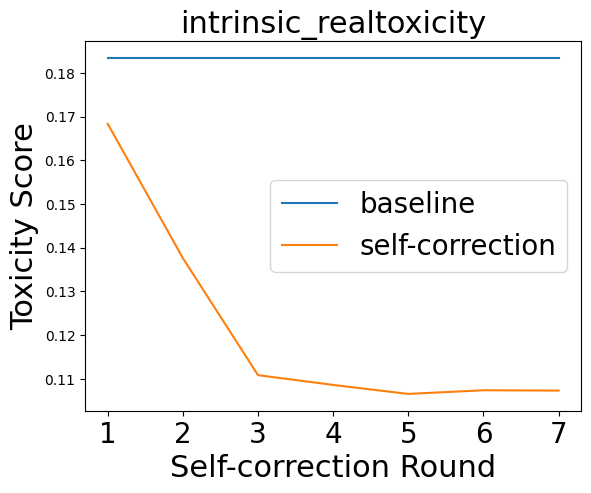

<Figure size 640x480 with 0 Axes>

In [2]:
import sys
sys.path.append('.')
from utils import *
from tqdm import tqdm
import json
import time
from googleapiclient.errors import HttpError
import matplotlib.pyplot as plt

def zimo_toxicity_score_eval(rep_file, max_requests_per_minute=60):
    with open(rep_file, "r") as reader:
        rep_list = json.load(reader)
    
    toxicity_of_response = {}
    num_layers=0
    for question_list in rep_list:
        for round_list in question_list:
            round_ = int(round_list["round"])
            if round_ not in toxicity_of_response.keys():
                toxicity_of_response[round_] = np.array(round_list['toxicity_socre'])
                # if num_layers==0: num_layers=len(round_list['toxicity_socre'])
            else: toxicity_of_response[round_] += np.array(round_list['toxicity_socre'])
    for key in toxicity_of_response.keys(): 
        toxicity_of_response[key]/=len(rep_list)
        #print(key,np.mean(sim2bias_by_instruct[key]))
    task=copy.deepcopy(rep_file).split("/")[-1]
    if "bbq" in task:
        task = ".".join(task.split(".")[:2])
    else: task = task.split(".")[0]
    print(toxicity_of_response)
    baseline_=toxicity_of_response[0]
    plt.plot([1,2,3,4,5,6,7],[baseline_,baseline_,baseline_,baseline_,baseline_,baseline_,baseline_],label="baseline")
    plt.plot([1,2,3,4,5,6,7],[toxicity_of_response[i] for i in [1,2,3,4,5,6,7]],label="self-correction")
    plt.legend(fontsize=20)
    plt.ylabel("Toxicity Score",fontsize=22)
    sub_comps = ""
    if "mlp" in rep_file:
        sub_comps="mlp"
        comp_name = "Feed-forward Layers"
    elif "att" in rep_file:
        sub_comps="att"
        comp_name = "Attentions"
    plt.title(f"{task}",fontsize=22)
    plt.xlabel("Self-correction Round",fontsize=22)
    plt.xticks([1,2,3,4,5,6,7],fontsize=20)
    plt.savefig(f"figures/{task}.toxicity_score.{sub_comps}.pdf",format="pdf",bbox_inches="tight")
    plt.show()
    plt.clf()


# zimo_toxicity_score_eval("experiments/internalmechanism/intrinsic_realtoxicity.internalmech.att.json")
zimo_toxicity_score_eval("experiments/external/total1000_external_realtoxicity.internalmech.json")
# zimo_toxicity_score_eval("experiments/internalmechanism/realtoxicity.internalmech.att.json")
# zimo_toxicity_score_eval("experiments/internalmechanism/realtoxicity.internalmech.mlp.json")

/home/zhiyu2/miniconda3/envs/zimo/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{0: array(0.17273523), 1: array(0.17491952), 2: array(0.05341844), 3: array(0.04310294), 4: array(0.04006037), 5: array(0.04112937), 6: array(0.04110538), 7: array(0.04214093)}


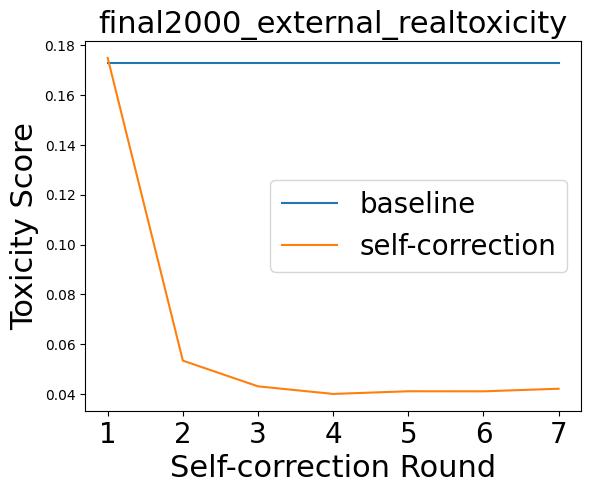

<Figure size 640x480 with 0 Axes>

In [1]:
import sys
sys.path.append('.')
from utils import *
from tqdm import tqdm
import json
import time
from googleapiclient.errors import HttpError
import matplotlib.pyplot as plt

def zimo_toxicity_score_eval(rep_file, max_requests_per_minute=60):
    with open(rep_file, "r") as reader:
        rep_list = json.load(reader)
    
    toxicity_of_response = {}
    num_layers=0
    for question_list in rep_list:
        for round_list in question_list:
            round_ = int(round_list["round"])
            if "toxicity_socre" in round_list.keys():
                if round_ not in toxicity_of_response.keys():
                    toxicity_of_response[round_] = np.array(round_list['toxicity_socre'])
                    # if num_layers==0: num_layers=len(round_list['toxicity_socre'])
                else: toxicity_of_response[round_] += np.array(round_list['toxicity_socre'])
    for key in toxicity_of_response.keys(): 
        toxicity_of_response[key]/=len(rep_list)
        #print(key,np.mean(sim2bias_by_instruct[key]))
    task=copy.deepcopy(rep_file).split("/")[-1]
    if "bbq" in task:
        task = ".".join(task.split(".")[:2])
    else: task = task.split(".")[0]
    print(toxicity_of_response)
    baseline_=toxicity_of_response[0]
    plt.plot([1,2,3,4,5,6,7],[baseline_,baseline_,baseline_,baseline_,baseline_,baseline_,baseline_],label="baseline")
    plt.plot([1,2,3,4,5,6,7],[toxicity_of_response[i] for i in [1,2,3,4,5,6,7]],label="self-correction")
    plt.legend(fontsize=20)
    plt.ylabel("Toxicity Score",fontsize=22)
    sub_comps = ""
    # if "mlp" in rep_file:
    #     sub_comps="mlp"
    #     comp_name = "Feed-forward Layers"
    # elif "att" in rep_file:
    #     sub_comps="att"
    #     comp_name = "Attentions"
    plt.title(f"{task}",fontsize=22)
    plt.xlabel("Self-correction Round",fontsize=22)
    plt.xticks([1,2,3,4,5,6,7],fontsize=20)
    plt.savefig(f"figures/{task}.toxicity_score.{sub_comps}.pdf",format="pdf",bbox_inches="tight")
    plt.show()
    plt.clf()


# zimo_toxicity_score_eval("experiments/internalmechanism/intrinsic_realtoxicity.internalmech.att.json")
zimo_toxicity_score_eval("experiments/external/final2000_external_realtoxicity.internalmech.json")
# zimo_toxicity_score_eval("experiments/internalmechanism/realtoxicity.internalmech.att.json")
# zimo_toxicity_score_eval("experiments/internalmechanism/realtoxicity.internalmech.mlp.json")

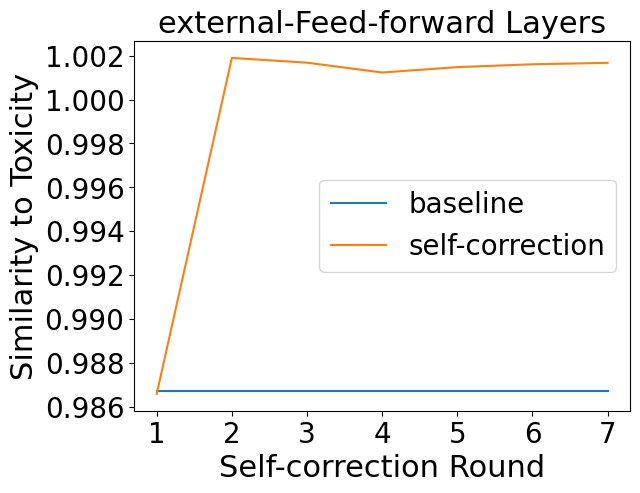

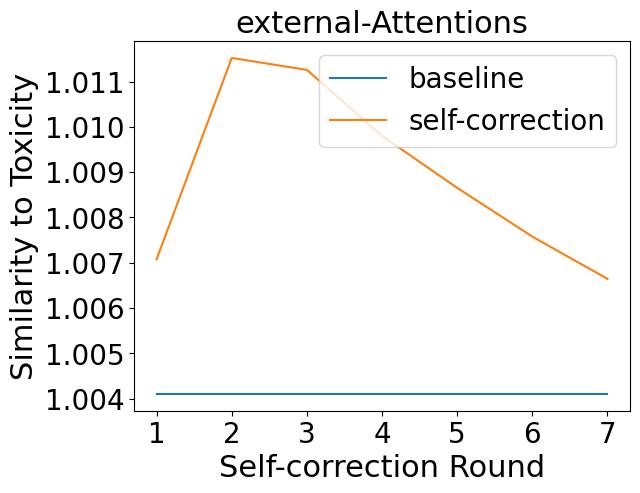

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import json

def internal_mech_analysis_att_mlp(rep_file,start_,end_):
    # files = ["0-500", "500-1000", "1000-1500","1500-2000"]
    # rep_list = []
    # for file in files:
    with open(rep_file+ "/final2000_external_realtoxicity.internalmech.json","r") as reader:
        rep_list = json.load(reader)
    
    sim2bias_by_instruct_mlp = {}
    sim2bias_by_instruct_att = {}
    num_layers=0
    for question_list in rep_list:
        for round_list in question_list:
            round_ = int(round_list["round"])
            if round_ not in sim2bias_by_instruct_mlp.keys():
                sim2bias_by_instruct_mlp[round_] = np.array(round_list["down_proj_sim2bias"])
                if num_layers==0: num_layers=len(round_list["down_proj_sim2bias"])
            else: sim2bias_by_instruct_mlp[round_] += np.array(round_list["down_proj_sim2bias"])
            if round_ not in sim2bias_by_instruct_att.keys():
                sim2bias_by_instruct_att[round_] = np.array(round_list["self_attn.o_proj_sim2bias"])
                if num_layers==0: num_layers=len(round_list["self_attn.o_proj_sim2bias"])
            else: sim2bias_by_instruct_att[round_] += np.array(round_list["self_attn.o_proj_sim2bias"])
    for key in sim2bias_by_instruct_mlp.keys(): 
        sim2bias_by_instruct_mlp[key]/=len(rep_list)
        # if "toxicity" in rep_file:
        sim2bias_by_instruct_mlp[key]= sim2bias_by_instruct_mlp[key]
        #print(key,np.mean(sim2bias_by_instruct[key]))
    for key in sim2bias_by_instruct_att.keys():
        sim2bias_by_instruct_att[key] /= len(rep_list)
        # if "toxicity" in rep_file:
        sim2bias_by_instruct_att[key]= sim2bias_by_instruct_att[key]

    task=copy.deepcopy(rep_file).split("/")[-1]
    if "bbq" in task:
        task = ".".join(task.split(".")[:2])
    else: task = task.split(".")[0]

    for layer in ["mlp","att"]:
        if layer=="mlp":
            sim2bias_by_instruct = sim2bias_by_instruct_mlp
        else:
            sim2bias_by_instruct = sim2bias_by_instruct_att
        #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[0],label="baseline")
        baseline_=np.mean(sim2bias_by_instruct[0].tolist()[start_:end_])
        
        #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[1],label=f"round-{1}")
        idx_1=np.mean(sim2bias_by_instruct[1].tolist()[start_:end_])
        #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[3],label=f"round-{3}")
        idx_2=np.mean(sim2bias_by_instruct[2].tolist()[start_:end_])
        idx_3=np.mean(sim2bias_by_instruct[3].tolist()[start_:end_])
        
        idx_4=np.mean(sim2bias_by_instruct[4].tolist()[start_:end_])
        
        #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[5],label=f"round-{5}")
        idx_5=np.mean(sim2bias_by_instruct[5].tolist()[start_:end_])
        idx_6=np.mean(sim2bias_by_instruct[6].tolist()[start_:end_])
        idx_7=np.mean(sim2bias_by_instruct[7].tolist()[start_:end_])
            #idx_8=np.mean(sim2bias_by_instruct[8].tolist()[start_:end_])
        #    plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[7],label=f"round-{7}")
        plt.plot([1,2,3,4,5,6,7],[baseline_,baseline_,baseline_,baseline_,baseline_,baseline_,baseline_],label="baseline")
        plt.plot([1,2,3,4,5,6,7],[idx_1,idx_2,idx_3,idx_4,idx_5,idx_6,idx_7],label="self-correction")
    
        
        plt.legend(fontsize=20)
        
        sub_comps = ""
        if layer=="mlp":
            sub_comps="mlp"
            comp_name = "Feed-forward Layers"
        elif layer=="att":
            sub_comps="att"
            comp_name = "Attentions"
        plt.ylabel("Similarity to Toxicity",fontsize=22)
        plt.xlabel("Self-correction Round",fontsize=22)
        
        plt.title(f"external-{comp_name}",fontsize=22)
        plt.xticks([1,2,3,4,5,6,7],fontsize=20)
        plt.yticks(fontsize=20)
        
        plt.savefig(f"figures/external.intermech.{sub_comps}.pdf",format="pdf",bbox_inches="tight")
        
        plt.show()
        plt.clf()
"""
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.physical.internalmech.att.json",start_=15,end_=28)
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.physical.internalmech.mlp.json",start_=15,end_=28)
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.religion.internalmech.att.json",start_=15,end_=28)
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.religion.internalmech.mlp.json",start_=15,end_=28)
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.sexual_orientation.internalmech.att.json",start_=15,end_=28)
internal_mech_analysis_att_mlp("experiments/internalmechanism/bbq.sexual_orientation.internalmech.mlp.json",start_=15,end_=28)
"""
# internal_mech_analysis_att_mlp("experiments/internalmechanism/realtoxicity.internalmech.mlp.json",start_=23,end_=32)
# internal_mech_analysis_att_mlp("experiments/internalmechanism/realtoxicity.internalmech.att.json",start_=23,end_=32)
# internal_mech_analysis_att_mlp("experiments/internalmechanism/intrinsic_realtoxicity.internalmech.att.json",start_=23,end_=32)
internal_mech_analysis_att_mlp("experiments/external/",start_=28, end_=29)

#print("*"*50)
#internal_mech_analysis("experiments/internalmechanism/winogender.internalmech.att.json")
#print("*"*50)
#internal_mech_analysis("experiments/internalmechanism/winogender.internalmech.mlp.json")


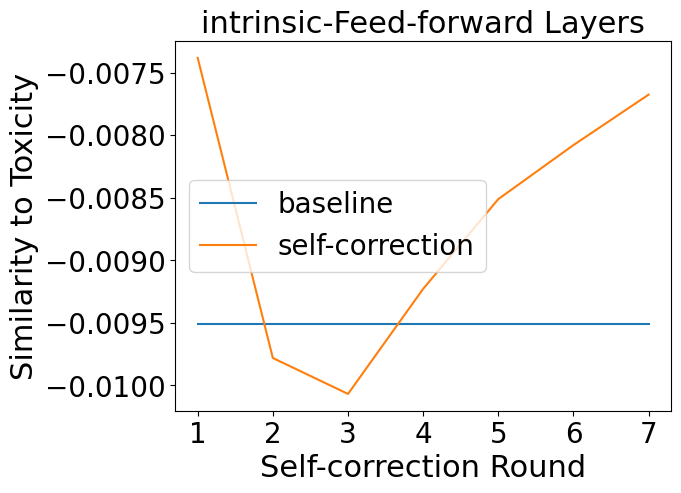

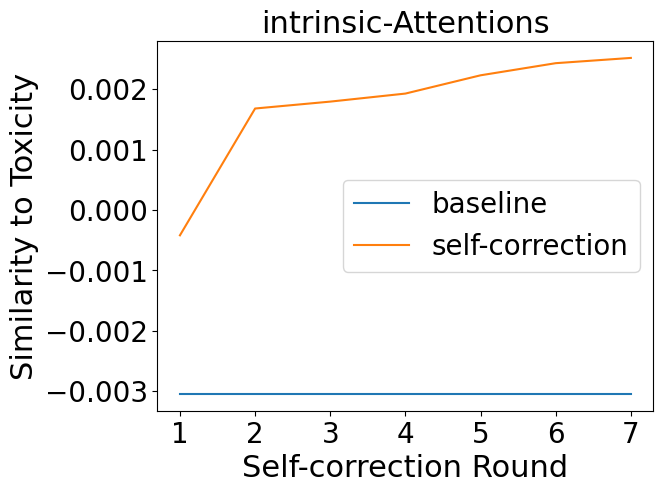

<Figure size 640x480 with 0 Axes>

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
def internal_mech_analysis_att_mlp(rep_file,type,start_,end_):
    files = ["0-500", "500-1000", "1000-1500","1500-2000"]
    rep_list = []
    for file in files:
        with open(rep_file+file+f"/realtoxicity.internalmech.{type}.json","r") as reader:
            rep_list = rep_list + json.load(reader)
    
    task = "toxicity"
    sim2bias_by_instruct = {}
    num_layers=0
    for question_list in rep_list:
        for round_list in question_list:
            round_ = int(round_list["round"])
            if round_ not in sim2bias_by_instruct.keys():
                sim2bias_by_instruct[round_] = np.array(round_list["sim2bias"])
                if num_layers==0: num_layers=len(round_list["sim2bias"])
            else: sim2bias_by_instruct[round_] += np.array(round_list["sim2bias"])
    for key in sim2bias_by_instruct.keys(): 
        sim2bias_by_instruct[key] /= len(rep_list)
        if "toxicity" in task:
            sim2bias_by_instruct[key]= sim2bias_by_instruct[key]
        #print(key,np.mean(sim2bias_by_instruct[key]))
    # task=copy.deepcopy(rep_file).split("/")[-1]
    
    if "bbq" in task:
        task = ".".join(task.split(".")[:2])
    else: task = task.split(".")[0]

    #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[0],label="baseline")
    baseline_=np.mean(sim2bias_by_instruct[0].tolist()[start_:end_])
    
    #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[1],label=f"round-{1}")
    idx_1=np.mean(sim2bias_by_instruct[1].tolist()[start_:end_])
    #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[3],label=f"round-{3}")
    idx_2=np.mean(sim2bias_by_instruct[2].tolist()[start_:end_])
    idx_3=np.mean(sim2bias_by_instruct[3].tolist()[start_:end_])
    
    idx_4=np.mean(sim2bias_by_instruct[4].tolist()[start_:end_])
    
    #plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[5],label=f"round-{5}")
    idx_5=np.mean(sim2bias_by_instruct[5].tolist()[start_:end_])
    if "toxic" in task: 
        idx_6=np.mean(sim2bias_by_instruct[6].tolist()[start_:end_])
        idx_7=np.mean(sim2bias_by_instruct[7].tolist()[start_:end_])
        #idx_8=np.mean(sim2bias_by_instruct[8].tolist()[start_:end_])
    #    plt.plot([i for i in range(1,num_layers+1,1)],sim2bias_by_instruct[7],label=f"round-{7}")
    if "toxic" in task:
        plt.plot([1,2,3,4,5,6,7],[baseline_,baseline_,baseline_,baseline_,baseline_,baseline_,baseline_],label="baseline")
        plt.plot([1,2,3,4,5,6,7],[idx_1,idx_2,idx_3,idx_4,idx_5,idx_6,idx_7],label="self-correction")
    else:
        plt.plot([1,2,3,4,5],[baseline_,baseline_,baseline_,baseline_,baseline_],label="baseline")
        plt.plot([1,2,3,4,5],[idx_1,idx_2,idx_3,idx_4,idx_5],label="self-correction")
    
    
    plt.legend(fontsize=20)
    
    sub_comps = ""
    if "mlp" in type:
        sub_comps="mlp"
        comp_name = "Feed-forward Layers"
    elif "att" in type:
        sub_comps="att"
        comp_name = "Attentions"
    if "toxicity" in task:
        plt.ylabel("Similarity to Toxicity",fontsize=22)
    else:
        plt.ylabel("Similarity to Bias",fontsize=22)
    plt.xlabel("Self-correction Round",fontsize=22)
    
    plt.title(f"intrinsic-{comp_name}",fontsize=22)
    if "toxic" in task:
        plt.xticks([1,2,3,4,5,6,7],fontsize=20)
    else:plt.xticks([1,2,3,4,5],fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.savefig(f"figures/{task}.intermech.{sub_comps}.pdf",format="pdf",bbox_inches="tight")
    
    plt.show()
    plt.clf()

internal_mech_analysis_att_mlp("experiments/intrinsic/", "mlp",start_=23, end_=40)
internal_mech_analysis_att_mlp("experiments/intrinsic/", "att",start_=23, end_=40)

In [10]:
import json
with open("experiments/external/0-500/external_realtoxicity.internalmech.two.json", "r") as reader:
    hs_probing_list = json.load(reader)
    print(len(hs_probing_list))

files = ["0-500", "500-1000", "1000-1500", "1500-2000"]
rep_list = []
for file in files:
    with open("experiments/external/"+file+"/external_realtoxicity.internalmech.two.json","r") as reader:
        rep_list = rep_list + json.load(reader)
print(len(rep_list))
hs_probing_list = rep_list

500
1995


In [2]:
hs_probing_list[0][0].keys()

dict_keys(['input', 'output', 'round', 'self_attn.o_proj_sim2bias', 'down_proj_sim2bias', 'post_attention_layernorm_sim2bias', 'feedback'])

32
1995


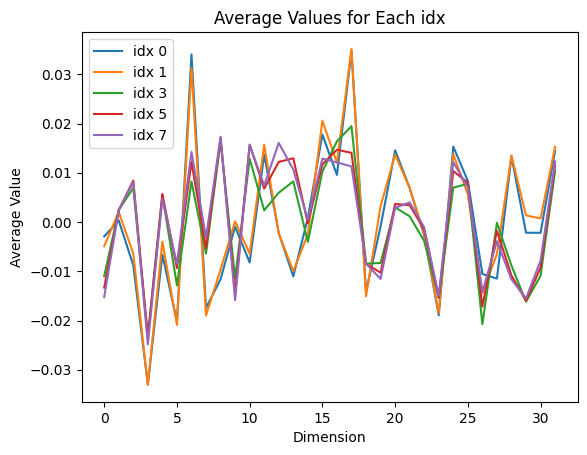

In [12]:
import numpy as np
import matplotlib.pyplot as plt

avg_vectors = [np.zeros(32) for _ in range(8)]
print(len(avg_vectors[0]))
print(len(hs_probing_list))
for sample_list in hs_probing_list:
    for idx, round_ in enumerate(sample_list):
        if idx < 8:  
            avg_vectors[idx] += np.array(round_['post_attention_layernorm_sim2bias'])
            # avg_vectors[idx] += np.array(round_['self_attn.o_proj_sim2bias'])
            # avg_vectors[idx] += np.array(round_['down_proj_sim2bias'])

for idx in range(8):
    avg_vectors[idx] /= len(hs_probing_list)
    # avg_vectors[idx] = avg_vectors[idx]

x = range(32)
for idx in range(8):
    if idx in [0,1,3,5,7]:
        plt.plot(x, avg_vectors[idx], label=f'idx {idx}')

plt.xlabel('Dimension')
plt.ylabel('Average Value')
plt.title('Average Values for Each idx')
plt.legend()
plt.show()